# Carga y Analisis de Memoria

In [46]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("./Documents/python-ml-course-master/datasets/train.csv", index_col='id', parse_dates=['fecha'])
sns.set(style="whitegrid")
plt.style.use('default')
df.head()

,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,banos,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
id,,,,,,,,,,,,,,,,,,,,,
254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,2.0,...,23533.0,NaN,NaN,2015-08-23,0.0,0.0,0.0,0.0,0.0,2273000.0
53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,2.0,...,24514.0,19.310205,-99.227655,2013-06-28,0.0,0.0,0.0,1.0,1.0,3600000.0
247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,2.0,...,48551.0,NaN,NaN,2015-10-17,0.0,0.0,0.0,0.0,0.0,1200000.0
209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,1.0,...,53666.0,19.301890,-99.688015,2012-03-09,0.0,0.0,0.0,1.0,1.0,650000.0
185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,1.0,...,47835.0,NaN,NaN,2016-06-07,0.0,0.0,0.0,0.0,0.0,1150000.0


In [7]:
df.memory_usage(deep=True)

Index                           1920000
titulo                         24604524
descripcion                   117551747
tipodepropiedad                15464278
direccion                      16862075
ciudad                         19092169
provincia                      18678722
antiguedad                      1920000
habitaciones                    1920000
garages                         1920000
banos                           1920000
metroscubiertos                 1920000
metrostotales                   1920000
idzona                          1920000
lat                             1920000
lng                             1920000
fecha                           1920000
gimnasio                        1920000
usosmultiples                   1920000
piscina                         1920000
escuelascercanas                1920000
centroscomercialescercanos      1920000
precio                          1920000
dtype: int64

In [8]:
df.memory_usage(deep=True).sum()

244893515

In [10]:
df['descripcion'] = df.descripcion.astype('category')

In [11]:
df['titulo'] = df.titulo.astype('category')

In [12]:
df['tipodepropiedad'] = df.tipodepropiedad.astype('category')

In [13]:
df['ciudad'] = df.ciudad.astype('category')

In [14]:
df['provincia'] = df.provincia.astype('category')

In [15]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240000 entries, 254099 to 121958
Data columns (total 22 columns):
titulo                        234613 non-null category
descripcion                   238381 non-null category
tipodepropiedad               239954 non-null category
direccion                     186928 non-null object
ciudad                        239628 non-null category
provincia                     239845 non-null category
antiguedad                    196445 non-null float64
habitaciones                  217529 non-null float64
garages                       202235 non-null float64
banos                         213779 non-null float64
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                         240000 non-null datetime64[ns]
gimnasio 

In [16]:
df.memory_usage(deep=True)

Index                           1920000
titulo                         25994583
descripcion                   125985666
tipodepropiedad                  242312
direccion                      16862075
ciudad                           587446
provincia                        243552
antiguedad                      1920000
habitaciones                    1920000
garages                         1920000
banos                           1920000
metroscubiertos                 1920000
metrostotales                   1920000
idzona                          1920000
lat                             1920000
lng                             1920000
fecha                           1920000
gimnasio                        1920000
usosmultiples                   1920000
piscina                         1920000
escuelascercanas                1920000
centroscomercialescercanos      1920000
precio                          1920000
dtype: int64

* Pasamos de 233 MB a una reduccion de 193 MB

# POR PROVINCIA

# Promedio de Provincias con Propiedades mas antiguas

Text(0, 0.5, 'Provincias')

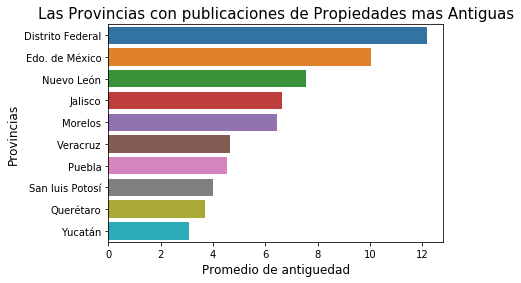

In [42]:
prom_ant_ciu = df.loc[:,['provincia','antiguedad']].groupby("provincia").\
    agg([np.mean,np.size])
show = prom_ant_ciu.loc[prom_ant_ciu[('antiguedad','size')]>5000,:].sort_values(('antiguedad','mean'), ascending=False)
g = sns.barplot(x=show['antiguedad','mean'].values, y=show['antiguedad','mean'].index, orient='h')
g.set_title("Las Provincias con publicaciones de Propiedades mas Antiguas", fontsize=15)
g.set_xlabel("Promedio de antiguedad", fontsize=12)
g.set_ylabel("Provincias", fontsize=12)


# Promedio de metros totales de cada Provincia


Text(0, 0.5, 'Provincias')

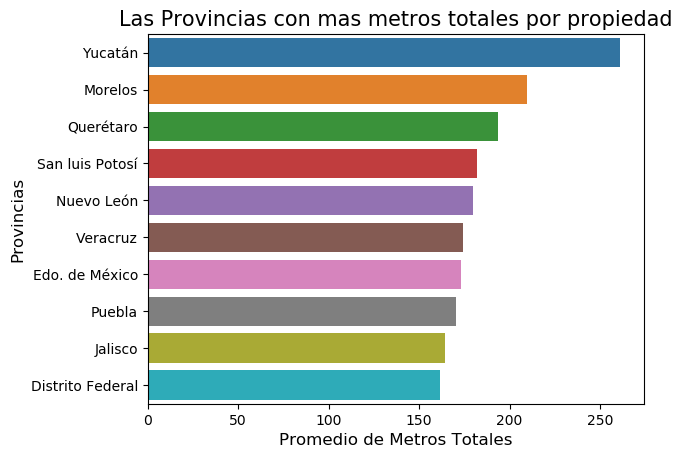

In [49]:
prom_ant_ciu = df.loc[:,['provincia','metrostotales']].groupby("provincia").\
    agg([np.mean,np.size])
show = prom_ant_ciu.loc[prom_ant_ciu[('metrostotales','size')]>5000,:].sort_values(('metrostotales','mean'), ascending=False)
g = sns.barplot(x=show['metrostotales','mean'].values, y=show['metrostotales','mean'].index, orient='h')
g.set_title("Las Provincias con mas metros totales por propiedad", fontsize=15)
g.set_xlabel("Promedio de Metros Totales", fontsize=12)
g.set_ylabel("Provincias", fontsize=12)

# Promedio del Valor de las propiedades de cada Provincia

Text(0, 0.5, 'Provincias')

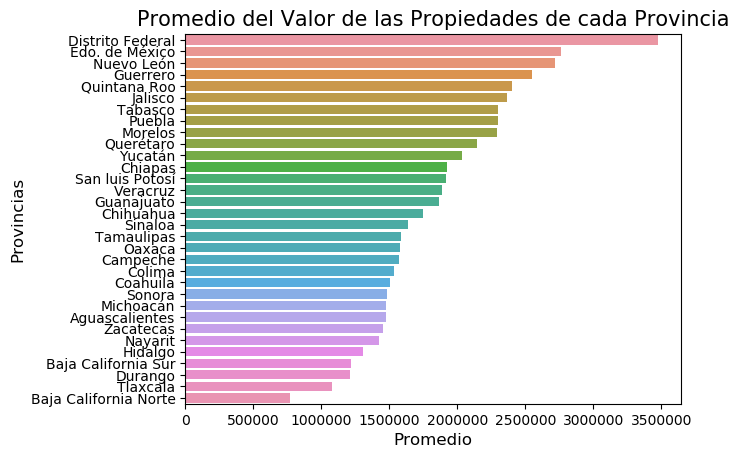

In [72]:
grouped = grouped.sort_values(by=['precio'],ascending=False)
g = sns.barplot(x=grouped['precio'].values, y=grouped['precio'].index, orient='h')
g.set_title("Promedio del Valor de las Propiedades de cada Provincia", fontsize=15)
g.set_xlabel("Promedio", fontsize=12)
g.set_ylabel("Provincias", fontsize=12)

# Cantidad de Publicaciones por Provincia

Text(0, 0.5, 'Provincias')

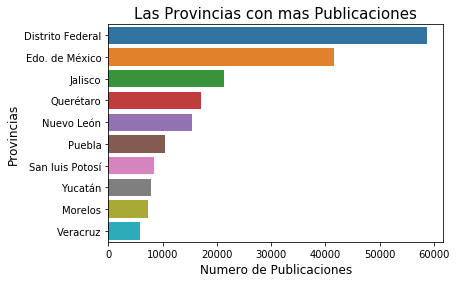

In [33]:
prov = df['provincia'].value_counts()
prov = prov.iloc[:10]
g = sns.barplot(x=prov.values, y=prov.index, orient='h')
g.set_title("Las Provincias con mas Publicaciones", fontsize=15)
g.set_xlabel("Numero de Publicaciones", fontsize=12)
g.set_ylabel("Provincias", fontsize=12)

# POR CIUDAD

# Promedio de antiguedad de los domicilios por ciudad

Text(0, 0.5, 'Ciudades')

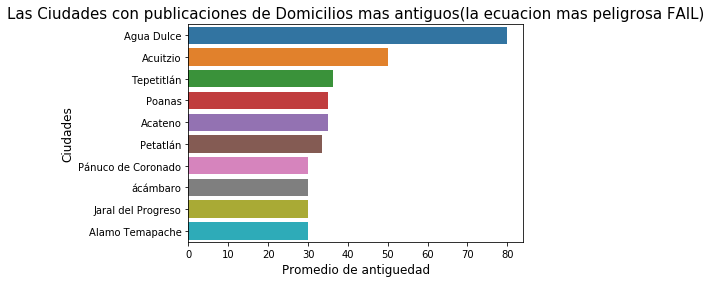

In [29]:
cc = df.groupby("ciudad")
cc = cc.mean()
cc = cc.sort_values(by=['antiguedad'],ascending=False)
cc = cc.iloc[:10,:]
g = sns.barplot(x=cc['antiguedad'].values, y=cc['antiguedad'].index, orient='h')
g.set_title("Las Ciudades con publicaciones de Domicilios mas antiguos(la ecuacion mas peligrosa FAIL)", fontsize=15)
g.set_xlabel("Promedio de antiguedad", fontsize=12)
g.set_ylabel("Ciudades", fontsize=12)

In [7]:
c.size()

ciudad
Abalá                1
Abasolo              6
Abejones             1
Acajete              8
Acambay              8
                    ..
ácatlán de Juárez    1
ácaxochitlán         5
ácámbaro             3
áutlán de Navarro    1
áyotlán              1
Length: 875, dtype: int64

In [22]:
c3 = c['antiguedad']
c3 = c3.describe()
c3 = c3.sort_values(by=['count'],ascending=False)
#c3 = c3.iloc[:200,:]
#g = sns.barplot(x=c3['count'].values, y=c3['count'].index, orient='h')
c3.head()

,count,mean,std,min,25%,50%,75%,max
ciudad,,,,,,,,
Querétaro,9593.0,3.772959,6.013187,0.0,0.0,1.0,5.0,51.0
Benito Juárez,9367.0,10.569339,12.252472,0.0,1.0,5.0,20.0,80.0
Zapopan,8704.0,5.874081,6.713965,0.0,0.0,5.0,10.0,50.0
Naucalpan de Juárez,5951.0,13.355570,11.149282,0.0,5.0,10.0,20.0,60.0
Alvaro Obregón,5910.0,10.393232,10.379449,0.0,2.0,8.0,18.0,80.0


*conclusion: hacer un filter en el size() para luego hacer el promedio asi no ocurre la ecuacion mas peligrosa de la historia, ya que anteriormente en nuestro top 10 habian ciudades que tenian entre 1 a 8 publicaciones, comparado con ciudades que tiene mas de 5000 publicacion y esto lo vamos a aplicar a todo los calculos con respecto a ciudades*


In [59]:
prom_ant_ciu = df.loc[:,['ciudad','antiguedad']].groupby("ciudad").\
    agg([np.mean,np.size])
show = prom_ant_ciu.loc[prom_ant_ciu[('antiguedad','size')]>1000,:].sort_values(('antiguedad','mean'), ascending=False)
show.head()

antiguedad        
                          mean    size
ciudad                                
Gustavo A. Madero    16.052927  3141.0
Iztacalco            15.459001  1207.0
Coyoacán             15.118539  5293.0
Venustiano Carranza  14.882995  1457.0
Nezahualcóyotl       14.783756  1055.0

Text(0, 0.5, 'Ciudades')

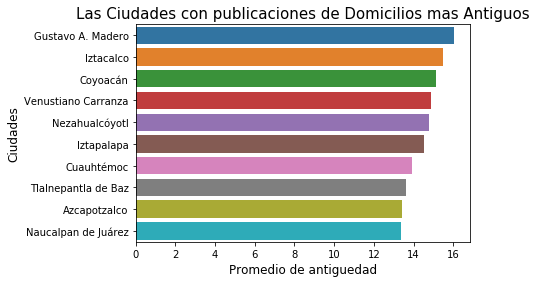

In [60]:
show = show.iloc[:10,:]
g = sns.barplot(x=show['antiguedad','mean'].values, y=show['antiguedad','mean'].index, orient='h')
g.set_title("Las Ciudades con publicaciones de Domicilios mas Antiguos", fontsize=15)
g.set_xlabel("Promedio de antiguedad", fontsize=12)
g.set_ylabel("Ciudades", fontsize=12)

# Las Ciudades con Publicaciones de Precios mas Elevados

Text(0, 0.5, 'Ciudades')

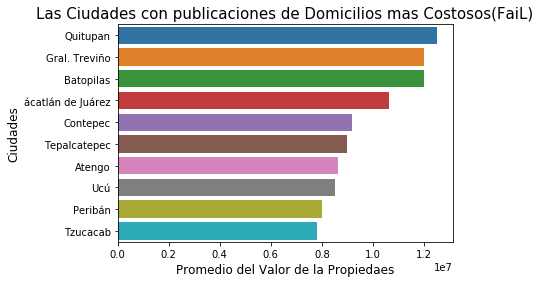

In [52]:
c1 = df.groupby("ciudad")
c1 = c1.mean()
c1 = c1.sort_values(by=['precio'],ascending=False)
c1 = c1.iloc[:10,:]
g = sns.barplot(x=c1['precio'].values, y=c1['precio'].index, orient='h')
g.set_title("Las Ciudades con publicaciones de Domicilios mas Costosos(FaiL)", fontsize=15)
g.set_xlabel("Promedio del Valor de la Propiedaes", fontsize=12)
g.set_ylabel("Ciudades", fontsize=12)

In [61]:
prom_prec_ciu = df.loc[:,['ciudad','precio']].groupby("ciudad").\
    agg([np.mean,np.size])
show = prom_prec_ciu.loc[prom_prec_ciu[('precio','size')]>1000,:].sort_values(('precio','mean'), ascending=False)
show.head()

precio        
                                mean    size
ciudad                                      
San Pedro Garza García  6.814673e+06  1470.0
Huixquilucan            5.475373e+06  5718.0
Cuajimalpa de Morelos   4.722205e+06  3020.0
La Magdalena Contreras  4.605869e+06  1905.0
Miguel Hidalgo          4.496526e+06  5795.0

Text(0, 0.5, '')

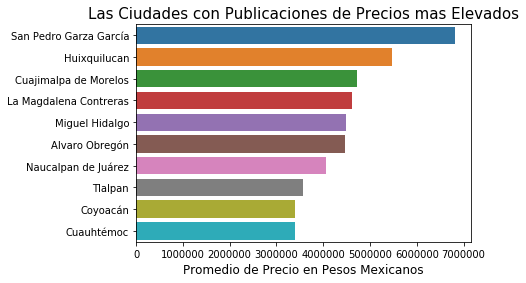

In [57]:
show = show.iloc[:10,:]
g = sns.barplot(x=show['precio','mean'].values, y=show['precio','mean'].index, orient='h')
g.set_title("Las Ciudades con Publicaciones de Precios mas Elevados", fontsize=15)
g.set_xlabel("Promedio de Precio en Pesos Mexicanos", fontsize=12)
g.set_ylabel("", fontsize=12)

# Las ciudades con mas Publicaciones de Propiedades

Text(0, 0.5, 'Ciudades')

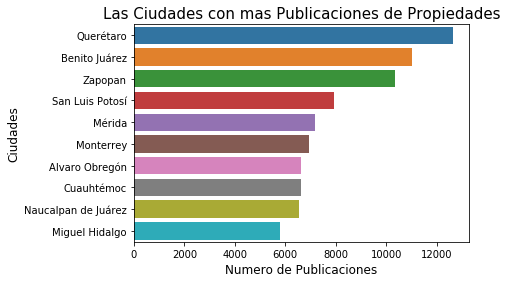

In [36]:
ciu = df['ciudad'].value_counts()
ciu = ciu.iloc[:10]
g = sns.barplot(x=ciu.values, y=ciu.index, orient='h')
g.set_title("Las Ciudades con mas Publicaciones de Propiedades", fontsize=15)
g.set_xlabel("Numero de Publicaciones", fontsize=12)
g.set_ylabel("Ciudades", fontsize=12)

## la ciudades con mas publicaciones tienden a ser mas costosas?

In [17]:
prom_prec_ciu = df.loc[:,['ciudad','precio']].groupby("ciudad").\
    agg([np.mean,np.size])
show = prom_prec_ciu.loc[prom_prec_ciu[('precio','size')]>200,:].sort_values(('precio','mean'), ascending=False)
show.columns = ['promedio_precio','cant_pub']
show
#show.plot.scatter(['promedio_precio'],['cant_pub'],alpha=0.25,figsize=(12,8));

,promedio_precio,cant_pub
ciudad,,
San Pedro Garza García,6.814673e+06,1470.0
Huixquilucan,5.475373e+06,5718.0
Cuajimalpa de Morelos,4.722205e+06,3020.0
La Magdalena Contreras,4.605869e+06,1905.0
Valle de Bravo,4.569151e+06,329.0
...,...,...
Cuautitlán,7.265068e+05,725.0
Soledad de Graciano Sánchez,6.723819e+05,420.0
Tizayuca,6.432446e+05,221.0


# metros totales por precio en ciudades

AttributeError: 'DataFrame' object has no attribute 'set_title'

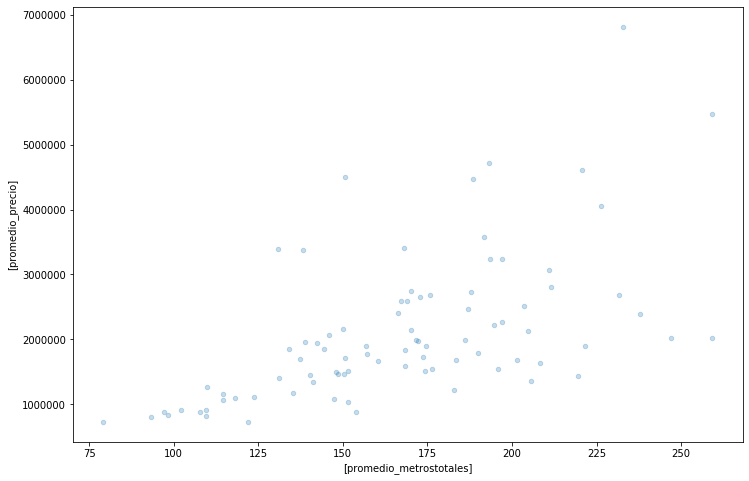

In [26]:
prom_prec_ciu = df.loc[:,['ciudad','precio','metrostotales']].groupby("ciudad").\
    agg([np.mean,np.size])
show = prom_prec_ciu.loc[prom_prec_ciu[('precio','size')]>500,:].sort_values(('precio','mean'), ascending=False)
show.columns = ['promedio_precio','cantp','promedio_metrostotales','cantmtt']
show
show.plot.scatter(['promedio_metrostotales'],['promedio_precio'],alpha=0.25,figsize=(12,8));
show.set_title("Precio Promedio por Metro total en Ciudades", fontsize=15)
show.set_xlabel("Metros Totales", fontsize=12)
show.set_ylabel("Precio", fontsize=12)

# metros cubiertos por precio en ciudades

AttributeError: 'DataFrame' object has no attribute 'set_title'

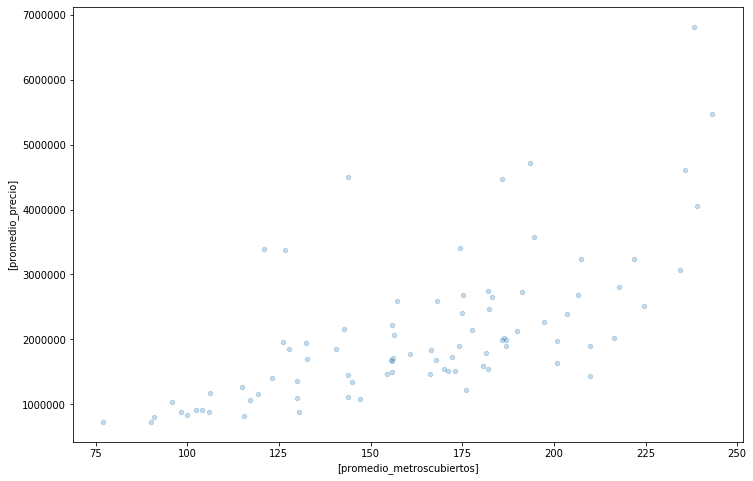

In [27]:
prom_prec_ciu = df.loc[:,['ciudad','precio','metroscubiertos']].groupby("ciudad").\
    agg([np.mean,np.size])
show = prom_prec_ciu.loc[prom_prec_ciu[('precio','size')]>500,:].sort_values(('precio','mean'), ascending=False)
show.columns = ['promedio_precio','cantp','promedio_metroscubiertos','cantmtt']
show
show.plot.scatter(['promedio_metroscubiertos'],['promedio_precio'],alpha=0.25,figsize=(12,8));
show.set_title("Precio Promedio por Metro total en Ciudades", fontsize=15)
show.set_xlabel("Metros Totales", fontsize=12)
show.set_ylabel("Precio", fontsize=12)

# metros totales por precio

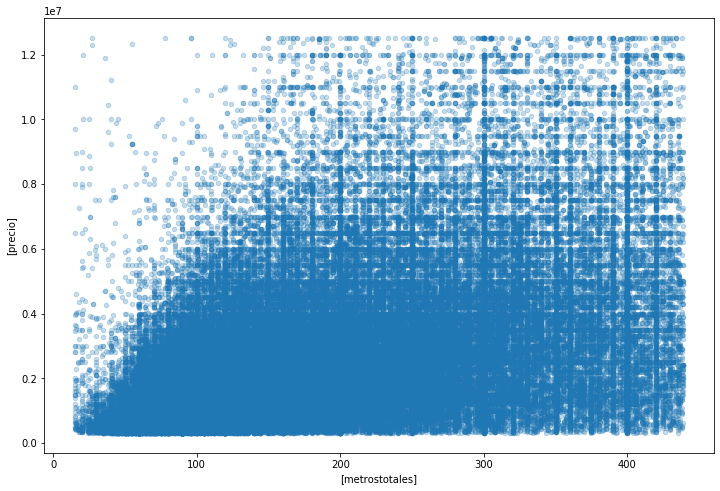

In [9]:
show = df.loc[:,['precio','metrostotales']]
show.plot.scatter(['metrostotales'],['precio'],alpha=0.25,figsize=(12,8));

# metros cubiertos por precio

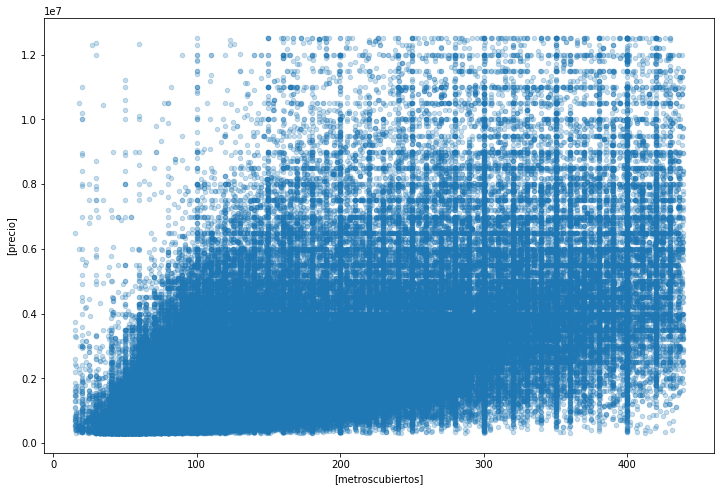

In [10]:
show = df.loc[:,['precio','metroscubiertos']]
show.plot.scatter(['metroscubiertos'],['precio'],alpha=0.25,figsize=(12,8));

# Tipo de Propiedades mas Costosa

In [42]:
pc = df.groupby('tipodepropiedad')
pc.mean()
#pc = pc.sort_values(by=['precio'],ascending=False)
##pc.apply(lambda pc: pc.sort_values(by=['precio'])
#g = sns.barplot(x=pc['precio'].values, y=pc['precio'].index, orient='h')
#g.set_title("Tipo de Propiedades Mas Costosas", fontsize=15)
#g.set_xlabel("Promedio del Valor de las Propiedades", fontsize=12)
#g.set_ylabel("Tipo de Propiedades", fontsize=12)

SyntaxError: unexpected EOF while parsing (<ipython-input-42-a198871b1712>, line 8)